## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

## This example is taken from an original C++ OpenGL implementation by Jarno Elonen. See https://elonen.iki.fi/code/tpsdemo 

## Radial Basis Functions with thin plate spline

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [7]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [34]:
def tps2d(r2):
    if (r2 == 0):
        val = 0
    else:
        val = r2*log(r2)/2
    return val

In [53]:
reg_coef = 1
#points = np.random.rand (20,3)*3

points = np.array([[1 , 1, -1], [-1,-1, -1],
            [0, 0, 1],  [1,-1,-1],
            [-1, 1,-1], [-2, 2, 1]])

n = points.shape[0]
m = 3
K = np.zeros([n,n])
x = points[:,0]
y = points[:,1]
z = points[:,2]

for i in range (n):
    for j in range (n):
        r2 = (x[i]-x[j])**2+(y[i]-y[j])**2
        K[i,j] = tps2d(r2)

G = np.zeros ([3, n])


for i in range (n):
    G[0,i] = 1
    G[1,i] = x[i]
    G[2,i] = y[i]

M = np.zeros([n+m,n+m])
M[0:n,0:n] = K
M[0:n,n:n+m] = G.T
M[n:n+m,0:n] = G
M = M + reg_coef * eye(n+m, n+m);
b = np.zeros(m+n)
b[0:n] = z
wd = np.linalg.solve(M,b)
w = wd[0:n]
d = wd[n:n+3]

XRange=np.arange(-2,2.1,0.1)
YRange=np.arange(-2,2.1,0.1)
X,Y=meshgrid(XRange,YRange);
Z = X * 0;
for xv in XRange:
    for yv in YRange:
        i = int((xv - XRange[0])/(XRange[1]-XRange[0])+0.5)
        j = int((yv - YRange[0])/(YRange[1]-YRange[0])+0.5)
        Z[i,j] = d[0] + d[1] * xv + d[2] * yv
        
        for k in range (n):
            r2 = (xv-x[k])**2+(yv-y[k])**2
            Z[i,j] = Z[i,j] + w[k] * tps2d(r2)

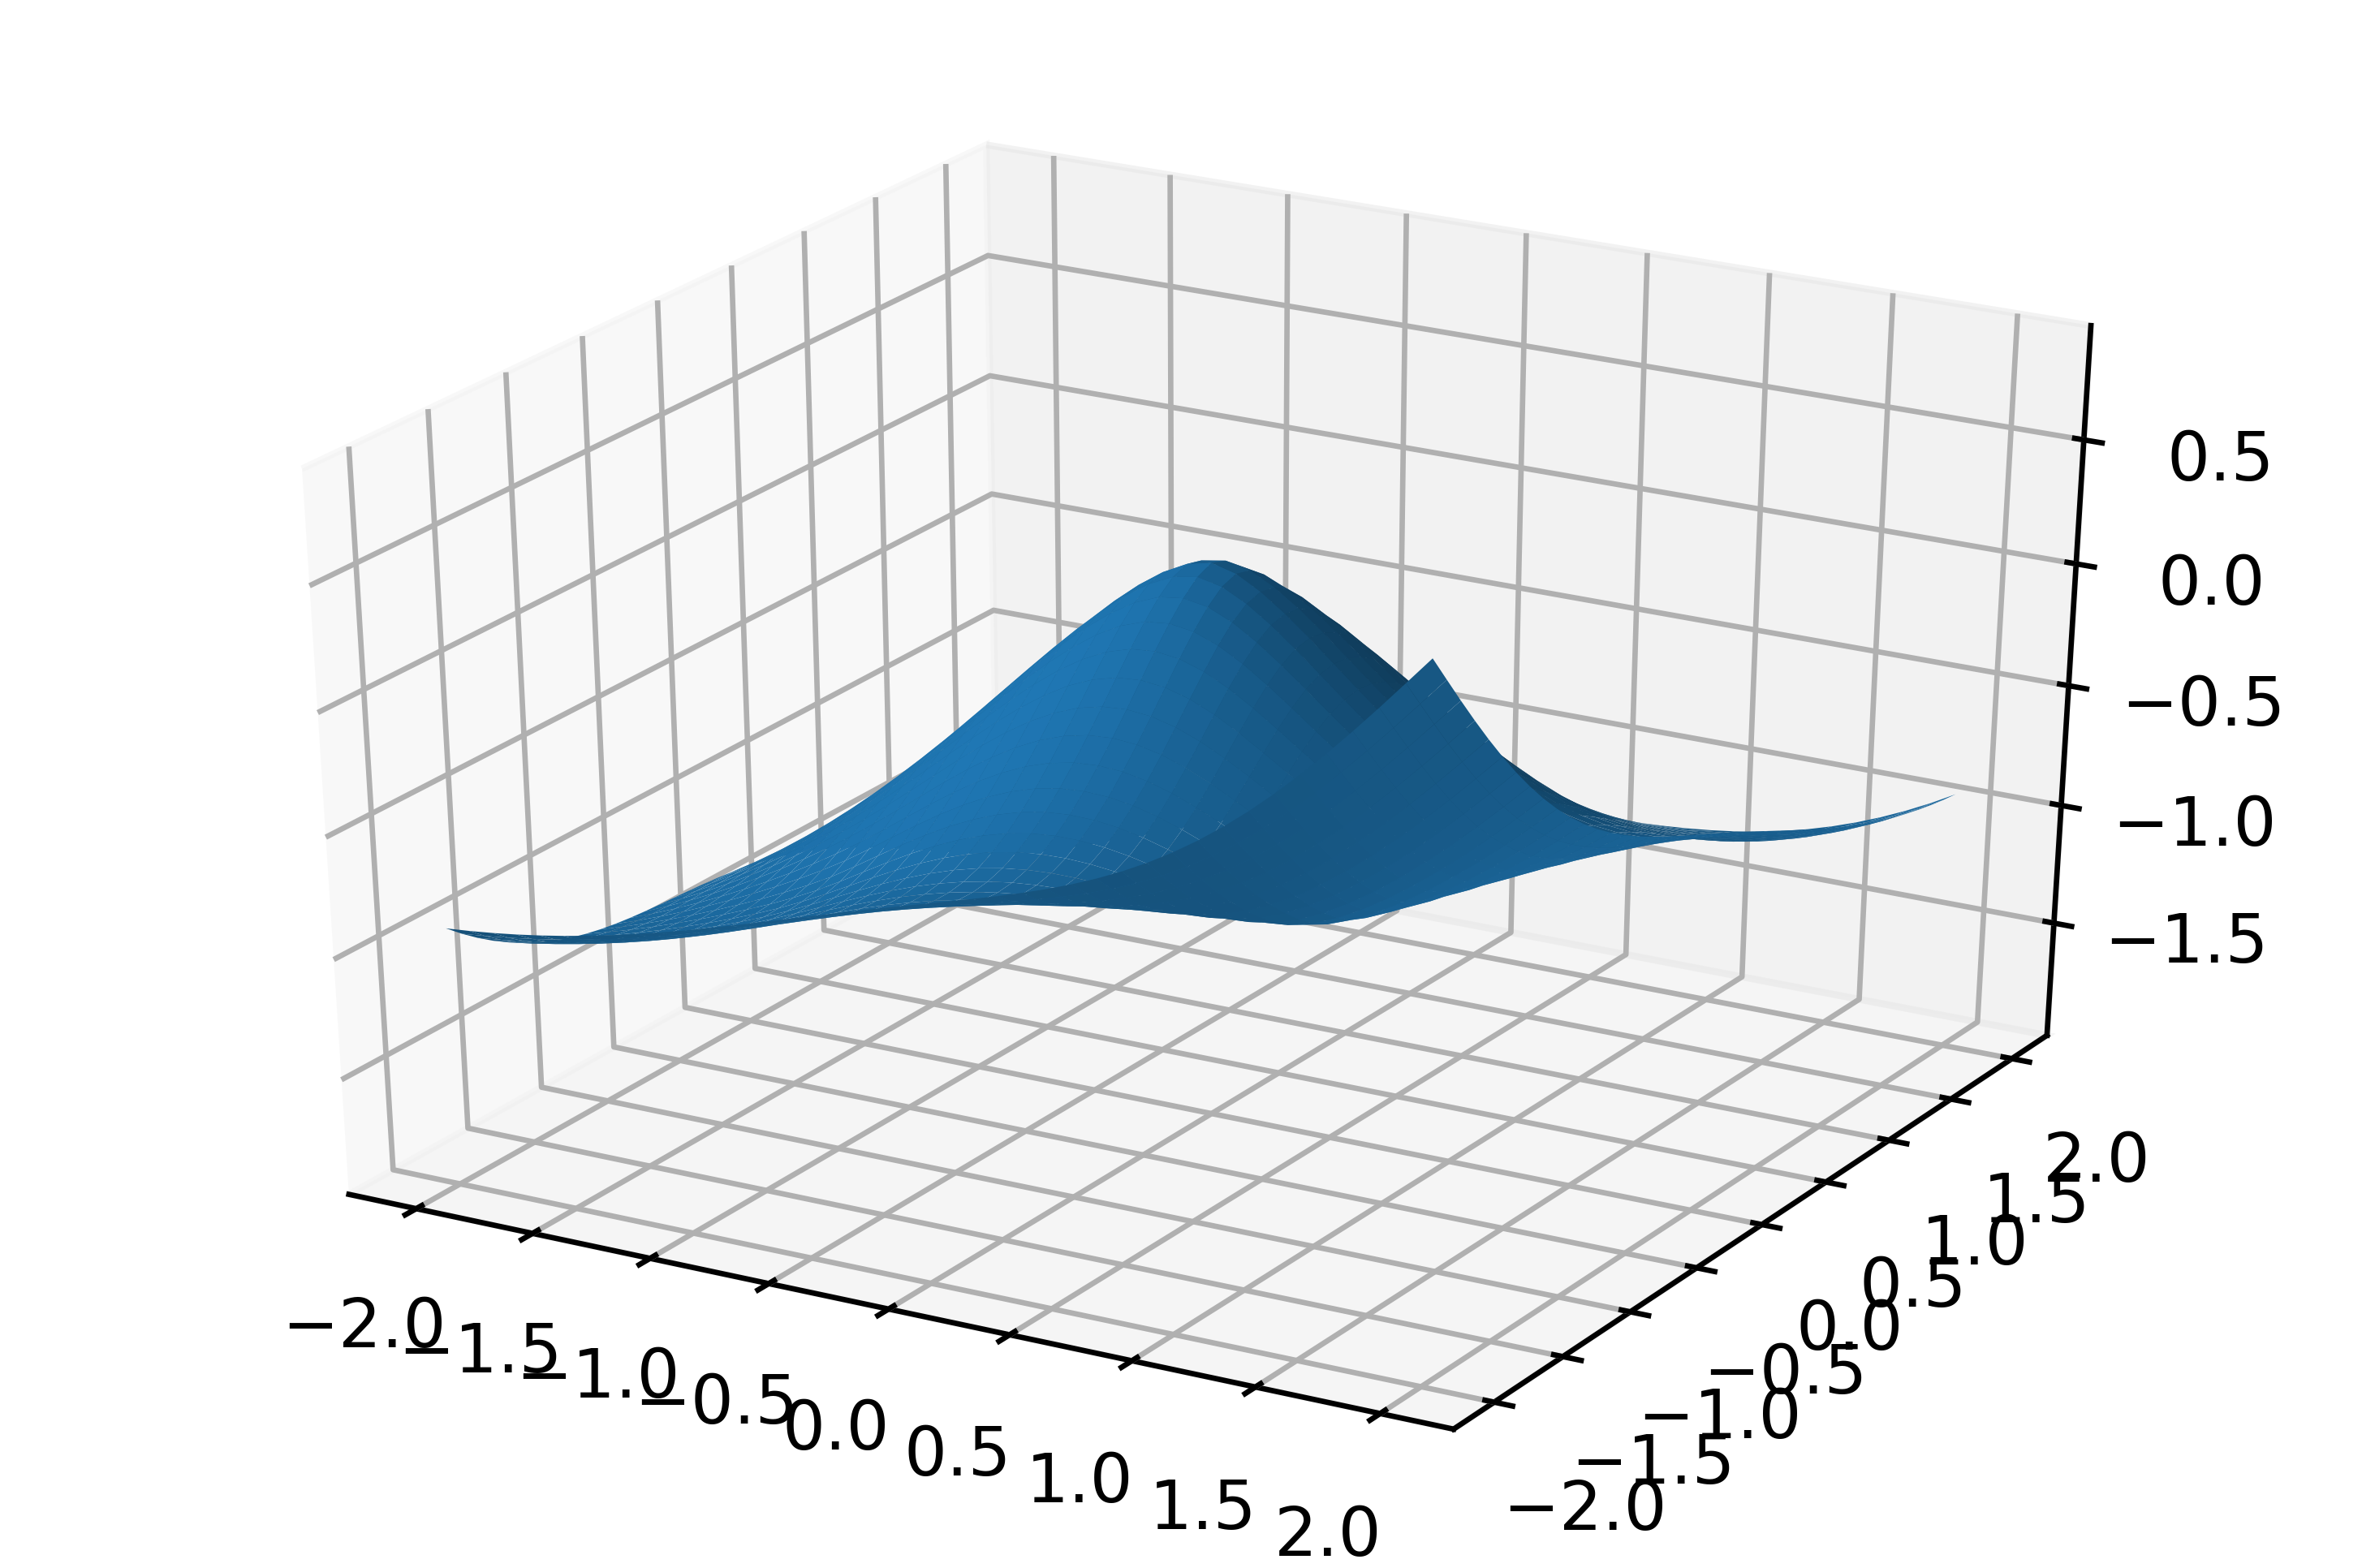

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

#Show the plot
plt.show()